# T1 - Getting started

Installing and getting started with Starsim is quite simple. 

To install, just type `pip install starsim`. If it worked, you should be able to import Starsim with `import starsim as ss`.

The basic design philosophy of Starsim is: **common tasks should be simple**. For example:

- Defining parameters
- Running a simulation
- Plotting results

This tutorial walks you through how to do these things.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/institutefordiseasemodeling/covasim/HEAD?urlpath=lab%2Ftree%2Fdocs%2Ftutorials%2Ftut_intro.ipynb) to open an interactive version of this notebook. [NB, URL is out of date.]
    
</div>

## Hello world

To create, run, and plot a sim is "just":

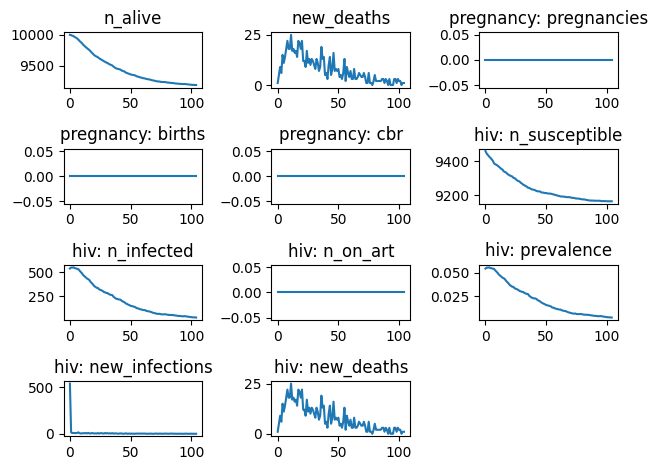

In [3]:
import sciris as sc
import starsim as ss

# Define the parameters
pars = sc.objdict(
    start         = 2000,       # Starting year
    n_years       = 20,         # Number of years to simulate
    dt            = 0.2,        # Timestep
    verbose       = 0,          # Don't print details of the run
    rand_seed     = 2,          # Set a non-default seed
)

# Make people
ss.set_seed(pars.rand_seed)
n_agents = int(10e3)
networks = [ss.mf(), ss.maternal()]
ppl = ss.People(n_agents, networks=networks)

# Make the sim
hiv = ss.HIV()
hiv.pars['beta'] = {'mf': [0.15, 0.10], 'maternal': [0.2, 0]}
sim = ss.Sim(pars=pars, people=ppl, demographics=ss.Pregnancy(), diseases=hiv)

# Run and plot
sim.run()
sim.plot();